# An Examination of my Golfing Ability 

Hello to any and all who may be viewing my research!  I would like to personally thank you for taking the time to join me as I dive deep into my scorecards. I will try to turn my recorded data into insights that I can use to become a better golfer.  I may not need to do this to know where my strengths and weaknesses are, but I might be able to gain insight into where I should consider pouring my efforts to improve.

Before we go any further, I should explain a little about myself.  I am 22 years old, 6'3'' and 370 lbs (down 100 since Jan '17!!).  I have been playing golf ever since my dad took me to the driving range when I was 9.  I first broke 100 on a full round of golf when I was 14 years old, and broke 90 when I was 19.  If there's any linearity to this, I have another couple of years before I should expect to break 80 (best is still 83!).  With bariatric surgery looming around the corner (8/16/17), it might be a little tough to expect it to come this season.  However, I'm hoping that as I lose the weight, my swing will naturally improve due to less resistance, my energy level will rise and my scores will go down as a result.  In the meantime, I often wonder which area of my game requires the most work:

Long Game (4 iron to driver)

Mid Game (Gap wedge to 5 iron)

Short Game (Sand wedge or closer)

Putting (any strokes from the putting surface)

To give ourselves an idea of how golfers can quantify their performance in these areas, I would STRONGLY RECOMMEND visiting this fantastic article:  https://mygolfspy.com/2016-report-overall-golfer-performance-by-handicap/
This website uses a database of over 400,000 golf rounds to calculate a number of KPIs.  The KPIs (Key Performance Indicators) for the areas mentioned above are:

Long Game: FIR % (Fairways in Regulation %)

Mid Game & Short Game: GIR % (Greens in Regulation %)

Putting: Putts per Round

(Bonus:  Round scoring, handicap)


Unfortunately, I never felt the need to pay $35 to get a Golfer Identification Number and a login to have an official handicap, (since I have not yet considered playing professionally or in tournaments...) so I am stuck with having to calculate my own golfer's handicap.

Note:  Handicap is a metric that golfers use to identify overall skill.  Any amateur tournament is going to be separated into tiers based on handicap.  After all, it's not fair to let a 3 handicap golfer play a 20 handicap golfer on a level playing field.  This would be analogous to allowing 150-lb and 290-lb wrestlers go head-to-head.  

This being said, a quick glance at the information on MyGolfSpy (link above) will give you an idea of how golfers, grouped by handicap, perform on the KPIs that follow.  Using this information, I hope to identify in which skill category I belong as well as where I lack relative to other golfers.  

So... without further ado, let's begin the exploration!


## The Data

To record my golf rounds, I enter all the information I track into an Excel spreadsheet.  I have chosen Excel because it is, IMHO, the most intuitive way to enter data.  Since I like to add my scores from my laptop and my desktop, I keep my spreadsheet stored on Google Drive.  I know it would be easier from an accessibility standpoint to use Google Sheets, but for a file as small as mine, it's a worthwhile tradeoff.

I keep track of the following data:

Course Name, Tees used, slope, date played, round score, and the following for each hole:
Par, Score, Handicap, Fairway/Green hit, Putts

From these, I have a few interpreted data points measured:

Net scoring, Relative to Net, FIR %, GIR %, and standard deviations of most.

The following script will initialize the spreadsheet as a dataframe in python 3, using the pandas library.  It also contains the definitions of some of my own functions that will help me later on:

In [199]:
# Created by Alex Borger
# Last modified: 8/12/2017

import os
import pandas as pd
import numpy as np
import scipy

os.chdir('C:\\Users\Alex\Documents')  # Note:  This will probably have to be changed based on where you have saved 
                                      # this folder.  

golf_data = pd.read_excel('Alex Golf Scores.xlsx',header = 3)

# DEFINITIONS

def fr(df,index):
    '''
    This function returns the total number of fairways hit in regulation for any given round represented as a row in a dataframe.
    '''
    fairways = 0
    for x in df.loc[index]:
        if type(x) is str:
            if len(x) < 4 and 'R' in x: 
                if 'F' in x:
                    fairways+=1
    return fairways

    
def get_hole_scores(df,index):
    '''
    This function will return a list of scores by hole for a particular round.  The first parameter is the dataframe 
    used to select the second parameter.  The second parameter is the index of the round to be parsed manually.
    '''
    
    return [df.loc[index]['Hole 1 Score'], df.loc[index]['Hole 2 Score'], df.loc[index]['Hole 3 Score'],
            df.loc[index]['Hole 4 Score'], df.loc[index]['Hole 5 Score'], df.loc[index]['Hole 6 Score'],
            df.loc[index]['Hole 7 Score'], df.loc[index]['Hole 8 Score'], df.loc[index]['Hole 9 Score'],
            df.loc[index]['Hole 10 Score'], df.loc[index]['Hole 11 Score'], df.loc[index]['Hole 12 Score'],
            df.loc[index]['Hole 13 Score'], df.loc[index]['Hole 14 Score'], df.loc[index]['Hole 15 Score'],
            df.loc[index]['Hole 16 Score'], df.loc[index]['Hole 17 Score'], df.loc[index]['Hole 18 Score']]
    

def get_hole_hcps(df,index):
    '''
    Works identically to get_hole_scores, but returns a list of handicaps by hole instead.
    '''
    return [df.loc[index]['Hole 1 Hcp'], df.loc[index]['Hole 2 Hcp'], df.loc[index]['Hole 3 Hcp'],
            df.loc[index]['Hole 4 Hcp'], df.loc[index]['Hole 5 Hcp'], df.loc[index]['Hole 6 Hcp'],
            df.loc[index]['Hole 7 Hcp'], df.loc[index]['Hole 8 Hcp'], df.loc[index]['Hole 9 Hcp'],
            df.loc[index]['Hole 10 Hcp'], df.loc[index]['Hole 11 Hcp'], df.loc[index]['Hole 12 Hcp'],
            df.loc[index]['Hole 13 Hcp'], df.loc[index]['Hole 14 Hcp'], df.loc[index]['Hole 15 Hcp'],
            df.loc[index]['Hole 16 Hcp'], df.loc[index]['Hole 17 Hcp'], df.loc[index]['Hole 18 Hcp']]


def gr(df,index):
    '''
    This functions returns the total number of greens hit in regulation for any given round represented as a row in a dataframe.
    '''
    greens = 0
    for x in df.loc[index]:
        if type(x) is str:
            if len(x) < 4 and 'R' in x: 
                if 'G' in x:
                    greens+=1
    return greens


def hcpsrank(df,index):
    '''
    This function finds the Spearman Rank Correlation between the scores and handicaps of each hole for a particular round.
    The result is in the range [-1,1] and represents the overall negative or positive trend between the two measures.
    Returns TWO values: (1) the correlation coefficient and (2) the associated p-value.
    '''
    r,p = scipy.stats.spearmanr(get_hole_scores(df,index),get_hole_hcps(df,index))
    print("The Spearman Rank Correlation for round at index {0} is {1}.".format(index,r))
    
    return r,p


def roundscore(df,index):
    '''
    This function will return the total round score for a particular round.  The first parameter is the dataframe 
    used to select the second parameter.  The second parameter is the index of the round to be parsed manually.
    '''
    return (df.loc[index]['Hole 1 Score'] + df.loc[index]['Hole 2 Score'] + df.loc[index]['Hole 3 Score'] +
            df.loc[index]['Hole 4 Score'] + df.loc[index]['Hole 5 Score'] + df.loc[index]['Hole 6 Score'] +
            df.loc[index]['Hole 7 Score'] + df.loc[index]['Hole 8 Score'] + df.loc[index]['Hole 9 Score'] +
            df.loc[index]['Hole 10 Score'] + df.loc[index]['Hole 11 Score'] + df.loc[index]['Hole 12 Score'] +
            df.loc[index]['Hole 13 Score'] + df.loc[index]['Hole 14 Score'] + df.loc[index]['Hole 15 Score'] +
            df.loc[index]['Hole 16 Score'] + df.loc[index]['Hole 17 Score'] + df.loc[index]['Hole 18 Score'])


def scorev():
    avgperhole = []
    ans = []
    for y in golf_data.index:
        netperhole = []
        par = 0
        score = 0
        for x in golf_data:
        
            if 'Hole' in x:
                if 'Par' in x:
                    par = golf_data.loc[y][x]
                if 'Score' in x:
                    score = golf_data.loc[y][x]
                    netperhole.append(score - par)
        avgperhole.append(netperhole)

    for i in range(18):
        s = 0
        for z in avgperhole:
            s += z[i]
        ans.append((s / len(golf_data.index)))
    
    return ans


## The Goal

My goal for this project is twofold:  

(1) Identify the area of my game that requires the most work.

(2) Give an approximation of my handicap based on how my KPI values compare to the MyGolfSpy database.

I believe that I can accomplish goal #1 by first accomplishing goal #2.  Therefore, I will be calculating my FIR %, GIR %, Scoring and Putts per Round.  First up is FIR %:

## Fairways in Regulation (FIR %)

In this section, I will take a look at one of our Tee-to-Green metrics: the Fairways in Regulation number. 

In golf, there are three (rarely four) par values for any given hole: A Par 3, Par 4 and a Par 5 (rarely will we see a Par 6, but there is one on Long Island, NY, where I live).

For any hole of par $ \geq 4$, there is a fairway.  Hitting fairways is essential to giving yourself the best chance of getting your next shot close to the hole.  Hitting from the fairway almost always gives us a better line of shot entry to the green as well as a near-perfect lie.  The FIR % metric does not take into account how wild missed fairways are, and is therefore not a perfect representation of Long Game ability.  However, it is an easy measure to calculate and gives us a fair explanation of our ability to hit the ball straight (or whichever way the fairway runs).

One tricky issue with this calculation of average percentage of fairways hit is that not every course has the same number of fairways!  In fact, among just the five different courses represented in my data, a simple printout shows how much it actually varies:



In [151]:
for x in golf_data.index:
    print(golf_data.loc[x]['Total Fairways'])

13
6
13
15
14
15
6


Wow - between two of these 18 hole courses there is a difference of NINE fairways!  Good thing we didn't assume each one had a standard 14 fairways...

In [152]:
s = 0
f = 0
for x in golf_data.index:
    s += fr(golf_data,x)  # Get the total number of fairways hit in a round
    f += golf_data.loc[x]['Total Fairways']   # Get the total number of fairways for the course of each round recorded
print(s / f  * 100)

29.2682926829


And there you have it.  My FIR % metric is approximately $29.3 \%$.

We'll hold this value in our memory bank for later.  Next up is GIR %.

## Greens in Regulation (GIR %)

In golf, hitting a green "in regulation" is defined as the following:

*A green is considered hit in regulation if any part of the ball is touching the putting surface after the player has taken at least two fewer strokes than par for that hole.*

-- Official PGA definition

The GIR metric is a pretty good indicator of overall Tee-to-Green ability.  Allowing yourself to take at least two putting strokes to get a par on a hole greatly improves your score.  

**Bonus:** While GIR might be a good measure of Tee-to-Green ability, it's not necessarily a great measure of Tee-to-Hole ability; you could hit every green in regulation but leave yourself 50 foot putts for birdie.  In this situation, one should expect to see an increase in total putts made for that round.  On the PGA Tour, statisticians record a lot more information than *I* do.  They measure other metrics such as Proximity to Hole, Strokes Gained: Putting/Tee-to-Green/From <100 yards/From $\geq$ 100 to < 150, etc.  With these metrics, professional golfers are able to scrutinize every last part of their game.  With a little bit of research into this topic, one would find a plethora of information about golfer's performances on the PGA Tour (not that I'm complaining!).  To see for yourself how dedicated the golfing community has become when it comes to data, check out this link to the official PGA Tour stats page: http://www.pgatour.com/stats.html


Calculating GIR % is easier than for FIR %, since we know every hole has a green, and I only record 18-hole rounds.

This one only takes four lines of code:

In [153]:
s = 0
for x in golf_data.index:
    s += gr(golf_data,x)  # Get the total number of greens hit over all rounds
print(( s / (18*len(golf_data.index)) ) * 100)

28.57142857142857


And so, my GIR % is approximately $28.6\%$.

Let's move on to Putts per Round.

## Putts per Round

Every golfer I've played with knows the saying, *Drive for show, putt for dough*.  This is 100% accurate!  Golf is a funny game where a 300-yard drive, a 175-yard approach to the green, a 20-foot putt and a 6-inch tap-in all count equally towards your score.  On an average 18-hole, par 72 course, one would expect 36 shots to the greens and another 36 shots from the putting surface.  This means that putting is a whopping $50\%$ of your score!  Now, of course, this almost *never* happens,  as we'll later discuss GIR % for scratch golfers and how it's surprisingly low.  Great golfers miss the greens quite a bit, but they're experts at getting the ball close to the hole and finishing up the job with one putt.  Because of this, I've noticed that GIR % and Putts per Round have a slight inverse relationship.

Calculating average Putts per Round will be extremely easy, since I have already recorded the total putts per round in excel:

In [154]:
s = 0
for x in golf_data.index:
    s += golf_data.loc[x]['Round Putts']
print(s / len(golf_data.index))

34.0


And so, I averaged $34$ putts per round.

Only one more KPI to find, and it's the most important one!

## Scoring

At the end of the day, the only number in golf that lets you know who's holding the trophy and who's packing their bags early is your **score**.  The score, or the total number of strokes taken from the 1st tee box to the 18th hole is quite obviously the most important number for anyone to measure.  If we wanted to simply use the average of all scores to represent scoring ability, we would not be taking into consideration the difference in **par** for each course.  Most courses are par 72, but they can vary quite a bit.  For example, the courses in my records have the following pars:

In [155]:
for x in golf_data.index:
    print(golf_data.loc[x]['Course Name'] + ': ' + str(golf_data.loc[x]['Course Par']))

The Vineyards Golf Club: 70
Heatherwood Golf Club: 60
Willow Creek Golf & Country Club: 71
Pine Hills Golf & Country Club: 73
Montauk Downs: 72
Pine Hills Golf & Country Club: 73
Heatherwood Golf Club: 60


As you can see, Pine Hills has a par $13$ strokes higher than Heatherwood.  To take this into consideration, we can simply take the average number of strokes over par for the round, and add it to 72 to give a *normalized* average score:

In [156]:
s = 0
for x in golf_data.index:
    s += golf_data.loc[x]['Rel Par']
print(s/len(golf_data.index) + 72)

89.5714285714


My average *normalized* score is roughly $89.6$.  This would be a fine place to stop, but I think we can take it one step further.  Before we do, though, I should introduce one more concept for those who are not familiar with the term *Slope* as it applies to golf courses.

## Slope

The **slope** of a golf course is a measure of relative difficulty.  A course of average difficulty has a slope of 113.  The slopes of the courses I have recorded rounds for are as follows:

In [183]:
for key, group in golf_data.groupby('Course Name')['Slope']:
    print(key + ': ' + str(int(group.mean())) + '\n')

Heatherwood Golf Club: 97

Montauk Downs: 132

Pine Hills Golf & Country Club: 129

The Vineyards Golf Club: 124

Willow Creek Golf & Country Club: 131



You might be wondering, why "slope"?  Why is the average 113?  Why not just add $N$ strokes to everyone's card and say the course handicap is just simply $N$?  Well, to answer these questions in order:

(1)  Just look here.  http://www.leaderboard.com/abcs.htm  This explains a LOT about slope.
(2)  Go here.  http://www.ongolfhandicaps.com/2014/07/why-is-113-in-slope-handicap-system.html  The United States Golf Association has some fairly bureaucratic rules governing the game.  The reason why the average slope is 113 is... **par for the course** (heh...).
(3)  If you took a quick peek at the articles referenced above, it's clear that the issues that face great golfers and bogey golfers can be pretty different.  For example, narrower fairways with trees on either side might not be a problem for a scratch golfer, but could be devastating for a 25-handicap golfer who struggles to hit the ball straight.  It's not fair to simply add a constant number to everyone's handicap, since a tough course might yield five extra strokes from a bogey golfer and only two from a scratch golfer.  To compensate for this, we use the following formula:

$CH = H * (S/113)$  where CH is a golfer's course handicap, H is the golfer's handicap and S is the course slope.

In reality, there is a much more complex formula used to calculate a golfer's true course handicap, but this formula is a good enough approximation.  For more info on the true formula, you can visit this page: http://golfsoftware.com/hsd/golf-handicap-formula.html


Now... based on this information about slopes, how might we give a more accurate representation of my average normalized score?

We could simply invert the formula from before to retrieve an expected score on a 113 slope course.  Doing so would put all scores on a level playing field of difficulty as well as a leveled course par.  The only real issue with this is:  **I don't have a handicap!!!**  This makes calculating my **true normalized** average score tricky.  Let's hold off on this section until a little further down.  For now, I think it's time we compare my results from earlier to MyGolfSpy's charts...

## Gimme a handicap... please!!

To review, my KPIs thus far have been:

**Score:** $89.6$

**Putts per Round:** $34$

**GIR %:** $28.6\%$

**FIR %:** $29.3 \%$


This next part is my favorite part of this inital data exploration.  If we look at the charts on MyGolfSpy's article, (here's the link again so you don't have to scroll up: https://mygolfspy.com/2016-report-overall-golfer-performance-by-handicap/) we can see that three of my four performance indicators fall smack-dab in the middle of the $11$ to $15$ handicap bin.  My FIR % is literally off the charts.  Based on this data alone, I would say it's safe to assume that I am playing golf at roughly a **13 handicap skill level**.  Does this mean I'm actually a 13 handicapper?  No.  But, it does accurately describe my playing *as of late*.


Well, would you look at that!  I accomplished one of the two things I set out to do at the beginning of this research project:  Find my handicap.  Cool, isn't it?


We're not done, though!  I still have to identify which aspect of my game needs the most work.  

Clearly, of the four measures I've calculated, the one lacking the most is FIR %.  I agree that I could use a lot of help from the tees, as I regularly hook and slice the ball right into the woods or tall grass.  Or water.  Or off the golf course entirely.  Needless to say, I should be straightening out my shots from the tees.

# Where to Go from Here

Clearly, of the four measures I've calculated, the one lacking the most is FIR %.  I agree that I could use a lot of help from the tees, as I regularly hook and slice the ball right into the woods or tall grass.  Or water.  Or off the golf course entirely.  Needless to say, I should be straightening out my shots from the tees.  But it would be overly simplistic to think that learning to hit my driver straight will fix my fairway woes completely;  I need to learn proper **course management**.  Every golf hole can be played several ways, and a smart golfer will learn how to navigate them safely.  If you know you're hitting your driver left lately but you've been smashing your 4-iron consistently down the middle of the fairway, it would be smarter to use a 4-iron on the tee than a driver, especially if there's trouble on the left, or if the hole has a dogleg right.

**Conclusion:**  I believe that the #1 thing I can do to improve my score is to put the ball in the fairway and in good position to the hole.  If I can give myself more chances to get the ball on the green, I can give myself more opportunities to make pars.  And after all, pars are a great score on any hole.

# Wrap-Up

If you're reading this, it means you have successfully scrolled down 90% of the way to the bottom of the page.  Congratulations!  This means you either read this research project, or you have a working mouse/keyboard.  Either way, I think this is a cause for celebration.  How am I gonna celebrate you ask?  Pretty obvious...






I'm gonna go play golf!



Until next time, yours truly,

$AlexBorger$

Still yearning for some hardcore statistical analysis?  I'm impressed at your grit.  I've added little bonus analyses below for your edification pleasure:

# Spearman Rank Correlation

In the following section, we will take a look at an interesting, albeit less useful measure of play.  Each hole on a golf course has a ranked difficulty called the Hole Handicap.  This is useful for handicapped tournaments, because this will allow the golfer with handicap $N$ to have $\lfloor N / 18 \rfloor$ shot(s) subtracted from each hole, and an additional shot sutracted from the $N  mod(18)$ toughest ranked holes.  For example, a 21 handicap golfer will get one stroke subtracted from  each hole and another shot taken off the 1st, 2nd and 3rd toughest holes.  

The idea of ranking each hole by difficulty implies a relationship between each hole's difficulty and the scores one would expect on these holes.  I want to see for myself if this implication holds any ground.  To do this, I simply run a quick scipy.stats.spearmanr test on the scores and handicaps of each hole for each round.  Below, you see the results.

In [184]:
r = 0   # Initializing the correlation value for each round.
p = 0   # Initializing the p-value for each round.
total = 0
for x in golf_data.index:
    r,p = hcpsrank(golf_data,x)
    total += r
total / len(golf_data.index)
    
 
    

The Spearman Rank Correlation for round at index 0 is -0.2885877566485028.
The Spearman Rank Correlation for round at index 1 is -0.40210591384128125.
The Spearman Rank Correlation for round at index 2 is -0.5169980775646796.
The Spearman Rank Correlation for round at index 3 is -0.06948764494720644.
The Spearman Rank Correlation for round at index 4 is -0.06109766751120599.
The Spearman Rank Correlation for round at index 5 is -0.28222674255480773.
The Spearman Rank Correlation for round at index 6 is -0.15737789507292677.


-0.25398309973437294

$r = -0.25398$

This result concludes that for my seven recorded rounds, my scoring is loosely correlated to the hole's difficulty.  I'm not entirely convinced of anything beyond this, because in my mind, a correlation value $ < \lvert 0.5 \rvert $ really doesn't show anything more than random noise.  Granted, this is a test of seven of my rounds and NOT a test of thousands of tour-grade golfers' rounds.  Needless to say, running this same test on the rounds of the greatest players ever might yield a different result.  

## Scoring Evolution

After playing golf seven times this summer, I've noticed that I seem to play better towards the end of the round.  I wonder if I plot my average scores on each hole relative to par, will I see evidence of this being the case?  Let's take a look!

-0.286098124882


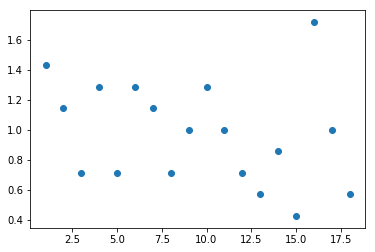

In [212]:
import matplotlib.pyplot as mp
%matplotlib inline
mp.scatter(range(1,19),scorev())

print(scipy.stats.pearsonr(range(1,19),scorev())[0])

As we can see, there really isn't too much evidence of a correlation between scoring and the number of holes already played.   I guess it's just mental!  